### Importing necessary libraries

In [24]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import statsmodels.formula.api as smf

### Importing data set

In [5]:
Delivery_data = pd.read_csv('/home/suraj/Downloads/Assignments/Assignment-4/delivery_time.csv')
Delivery_data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [30]:
Delivery_data = Delivery_data.rename({'Delivery Time':'delivery_time','Sorting Time':'sorting_time'}, axis =1)
Delivery_data

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


### Initial Analysis

In [6]:
Delivery_data.shape

(21, 2)

In [7]:
Delivery_data.isna().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [8]:
Delivery_data.dtypes

Delivery Time    float64
Sorting Time       int64
dtype: object

### Assumption check

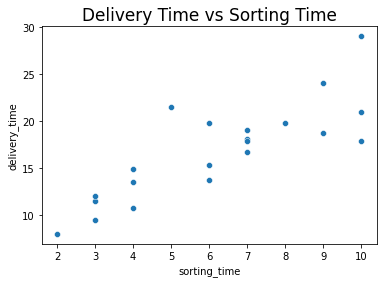

In [31]:
sns.scatterplot(x = 'sorting_time', y = 'delivery_time', data = Delivery_data)
plt.title('Delivery Time vs Sorting Time',size = 17)
plt.show()

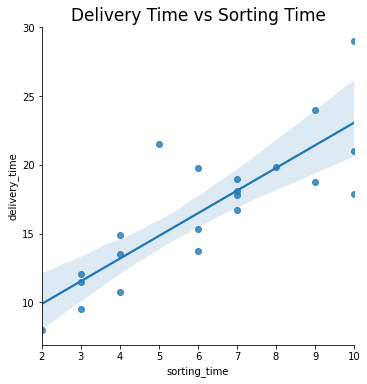

In [32]:
sns.lmplot(x = 'sorting_time', y = 'delivery_time', data = Delivery_data)
plt.title('Delivery Time vs Sorting Time',size = 17)
plt.show()

In [33]:
Delivery_data.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


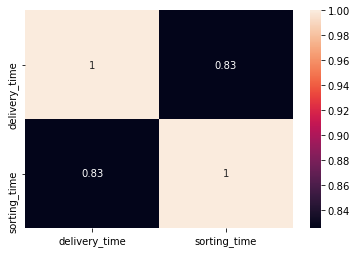

In [34]:
sns.heatmap(data = Delivery_data.corr(), annot = True)
plt.show()

### Model building

In [37]:
linear_model = smf.ols('delivery_time~sorting_time', data = Delivery_data).fit()

### Model testing

In [38]:
linear_model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [39]:
linear_model.tvalues, linear_model.pvalues

(Intercept       3.823349
 sorting_time    6.387447
 dtype: float64,
 Intercept       0.001147
 sorting_time    0.000004
 dtype: float64)

In [40]:
linear_model.rsquared, linear_model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

### Model prediction

In [41]:
# Manual prediction for sorting time 5
delivery_pred = (6.582734) + (1.649020)*(5)
delivery_pred

14.827834

In [42]:
# Automatic Prediction for sorting time 5,7,8,10
new_data=pd.Series([5,7,8,10])
new_data

0     5
1     7
2     8
3    10
dtype: int64

In [49]:
test_data = pd.DataFrame(new_data, columns=['sorting_time'])
test_data

,sorting_time
0,5
1,7
2,8
3,10


In [50]:
linear_model.predict(test_data)

0    14.827833
1    18.125873
2    19.774893
3    23.072933
dtype: float64